In [0]:
# Cargar el Drive helper y mount
from google.colab import drive

# Link y Codigo de autorizacion.
drive.mount('/content/drive_all')

# Cargar datos del google drive
#data = pd.read_csv('/content/drive_all/My Drive/PYTHON/dataset/polydata2.csv')

# EJEMPLO

In [0]:



import csv
import random

# load irist dataset and randomly split it into test set and training set

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
	with open(filename, 'rt') as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(len(dataset)-1):
	        for y in range(4):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])


#############################
# SIMILARITY CHECK FUNCTION #
#############################

# euclidean distance calcualtion

import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)



############################################################
# NEIGHBOURS - selecting subset with the smallest distance #
############################################################

import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors



######################
# PREDICTED RESPONSE #
######################

import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]



######################
# MEASURING ACCURACY #
######################

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] in predictions[x]: 
			correct = correct + 1
			
	return (correct/float(len(testSet))*100) 

def main():
	# prepare data
	trainingSet=[]
	testSet=[]
	split = 0.67
  #data = pd.read_csv('/content/drive_all/My Drive/PYTHON/dataset/polydata2.csv')
	loadDataset('/content/drive_all/My Drive/PYTHON/dataset/iris.data', split, trainingSet, testSet)
	#print ('Train set: ' + repr(len(trainingSet)))
	#print ('Test set: ' + repr(len(testSet)))
	# generate predictions
	predictions=[]
	k = 3
	for x in range(len(testSet)):
		neighbors = getNeighbors(trainingSet, testSet[x], k)
		result = getResponse(neighbors)
		predictions.append(result)
		print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
	accuracy = getAccuracy(testSet, predictions)
	print('Accuracy: ' + repr(accuracy) + '%')
	

  
main()

> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', a

# Ejemplo

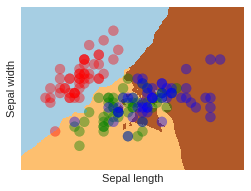

In [0]:
# Code source: Gael Varoqueux
# Modified for Documentation merge by Jaques Grobler
# License: BSD

import numpy as np
import pylab as pl
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. 
Y = iris.target


h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

s=100
cc=['r','g','b']
ycc= [cc[i]  if i<3  else '' for i in Y]
#mm=['^','s','o']
#ymm = [mm[i]  if i<3  else '' for i in Y]

# Plot also the training points
pl.scatter(X[:,0], X[:,1],c=ycc , s=s, marker='o', alpha=.4)
pl.xlabel('Sepal length')
pl.ylabel('Sepal width')
#, color='r', s=s/3, marker='s', alpha=.4

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

In [0]:
!pip install ipywidgets

from ipywidgets import interact

def f(x):
  return x

interact(f, x=10)

10

<function __main__.f>

In [0]:
!pip install sklearn
!pip install pandas
!pip install mglearn
!pip install matplotlib
!pip install numpy

  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


Los vecinos más cercanos k, o KNN, es uno de los modelos más simples y populares que se utilizan en el Aprendizaje automático en la actualidad. Técnicamente es un algoritmo de aprendizaje perezoso, no paramétrico. Básicamente, todo lo que hace es almacenar el conjunto de datos de entrenamiento, luego, para predecir un punto de datos futuro, busca el punto de datos más cercano y lo categoriza con el punto existente. Podría ser más fácil de entender con una imagen, por lo que aquí hay una que muestra un conjunto de datos 2D con el punto verde que representa el punto de predicción y los diferentes círculos muestran diferentes valores para K.

https://www.code-nerd.com/2018/10/14/k-nearest-neighbor-machine-learning-algorithm/

# EJEMPLO


permite implementar una versión de KNN con Python. Vuelva a su archivo y en la parte superior necesitamos importar algunos paquetes, así que escriba:

In [0]:

from sklearn.model_selection import train_test_split
import pandas as pd
import mglearn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


ahora, debajo de las importaciones, necesitamos crear una instancia de los datos de entrenamiento que utilizaremos, proporcionados por el paquete mglearn.

In [0]:

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)



A continuación, debemos indicar el número de vecinos que usaremos y luego debemos ajustar el clasificador utilizando nuestro conjunto de entrenamiento.

In [0]:

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86



ahora vamos a trazar esta cosa. Para ello utilizaremos matplotlib y mglearn. Adelante, escribe esto:

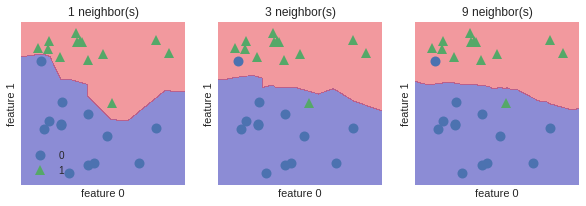

In [0]:

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)
plt.show()

# EJEMPLO

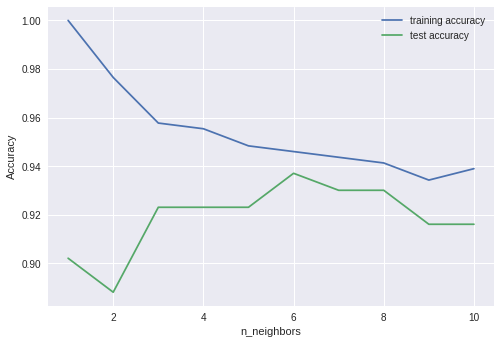

In [0]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target,
    random_state=66)
# Create training and testing datasets

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings,
         training_accuracy, label="training accuracy")
plt.plot(neighbors_settings,
        test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# EJEMPLO

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


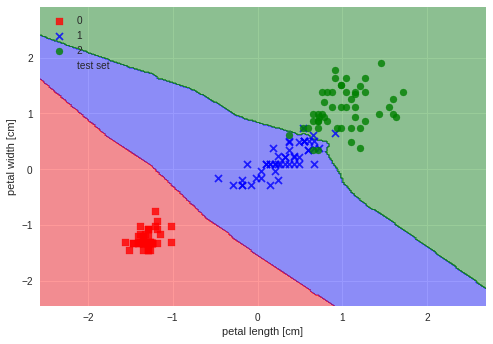

In [0]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'green', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

# EJEMPLO

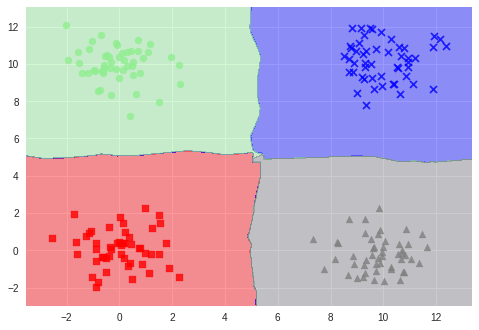

In [0]:
# -*- coding: utf-8 -*-

import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def plot_decision_regions(X, y, classifier, resolution=0.02):
    #  
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #  
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    #  
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    #  
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    #  
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for i, cls in enumerate(np.unique(y)):
        plt.scatter(X[y==cls, 0], X[y==cls, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cls)

    plt.show()

if __name__ == '__main__':
    # 
    np.random.seed(0)
    X1 = np.random.randn(50, 2)
    y1 = np.ones(50)
    X2 = np.random.randn(50, 2) + 10
    y2 = np.ones(50)*2
    X3 = np.random.randn(50, 2)
    X3[:, 1] += 10
    y3 = np.ones(50)*3
    X4 = np.random.randn(50, 2)
    X4[:, 0] += 10
    y4 = np.ones(50)*4 
    X = np.concatenate((X1, X2, X3, X4))
    y = np.concatenate((y1, y2, y3, y4))

    # KNN
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(X, y)

    # 
    plot_decision_regions(X, y, knn)

# EJEMPLO




/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


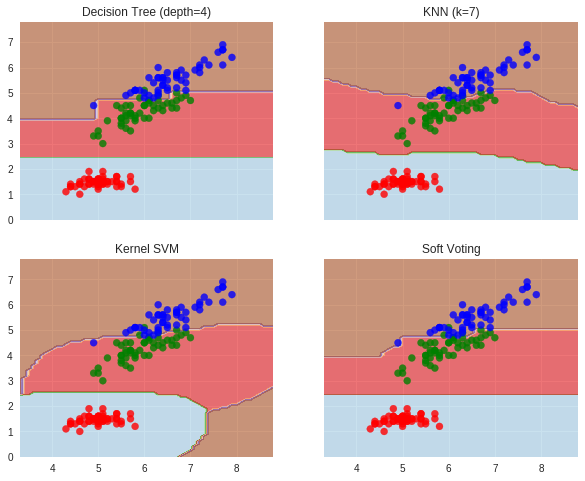

In [0]:
from itertools import product
#http://lijiancheng0614.github.io/scikit-learn/auto_examples/ensemble/plot_voting_decision_regions.html
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

cc=['r','g','b']
ycc= [cc[i]  if i<3  else '' for i in Y]

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.6)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=ycc, alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# EJEMPLO

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_error
   

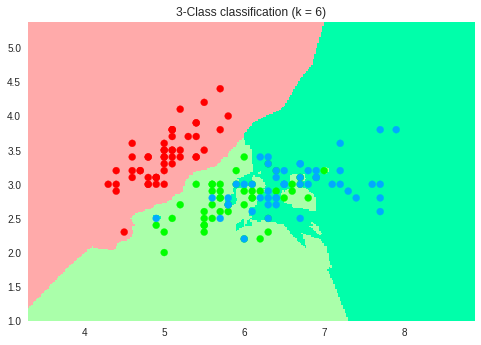

In [0]:
import matplotlib
matplotlib.use('GTKAgg')
 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
 
n_neighbors = 6
 
# import some data to play with
iris = datasets.load_iris()
 
# prepare data
X = iris.data[:, :2]  
y = iris.target
h = .02 
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00FFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

In [0]:
from sklearn import datasets
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
  scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

In [0]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2,1,2])

clf1 = clf1.fit(X,y)
clf2 = clf2.fit(X,y)
clf3 = clf3.fit(X,y)
eclf = eclf.fit(X,y)



In [0]:
from sklearn.grid_search import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(iris.data, iris.target)

/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but 

# Introducción
ID3 es un algoritmo de clasificación que, para un conjunto dado de atributos y etiquetas de clase, genera el modelo / árbol de decisión que clasifica una entrada dada a una etiqueta de clase específica Ck [C1, C2, ..., Ck]. El algoritmo sigue un enfoque codicioso seleccionando un mejor atributo que produce la ganancia de información máxima (IG) o la entropía mínima (H). El algoritmo luego divide el conjunto de datos (S) de forma recursiva sobre otros atributos no utilizados hasta que alcanza el criterio de parada (no hay más atributos para dividir). Los nodos no terminales en el árbol de decisión representan el atributo seleccionado en el que se produce la división y los nodos terminales representan las etiquetas de clase.

https://machinelearningforbeginners.wordpress.com/


PASO 1: ENTROPY CÁLCULO
El método toma el conjunto de datos dado como un argumento y realiza el cálculo de Entropía sobre el conjunto de datos dado.

In [0]:
#Entropy Calculation method
def calc_entropy(data):
 #Calculate the length of the data-set
 entries = len(data) 
 labels = {}
 #Read the class labels from the data-set file into the dict object "labels"
 for rec in data:
   label = rec[-1] 
   if label not in labels.keys():
     labels[label] = 0
     labels[label] += 1
 #entropy variable is initialized to zero
 entropy = 0.0
 #For every class label (x) calculate the probability p(x)
 for key in labels:
   prob = float(labels[key])/entries
 #Entropy formula calculation
   entropy -= prob * log(prob,2) 
 #print "Entropy -- ",entropy
 #Return the entropy of the data-set
 return entropy


**PASO 2: SELECCIÓN DE ATRIBUTO**
Tenemos que determinar el atributo en función del cual se dividirá el conjunto de datos (S). El método de selección de atributos devuelve el mejor atributo con la ganancia de información máxima IG (S) que se utiliza en la construcción del árbol de decisión

In [0]:
#Function to determine the best attribute for the split criteria
def attribute_selection(data):
  #get the number of features available in the given data-set
  features = len(data[0]) - 1
  #Fun call to calculate the base entropy (entropy of the entire data-set)
  baseEntropy = calc_entropy(data)
  #initialize the info-gain variable to zero
  max_InfoGain = 0.0;
  bestAttr = -1

  #iterate through the features identified
  for i in range(features):
    #store the values of the features in a variable
    AttrList = [rec[i] for rec in data]
    #get the unique values from the feature values
    uniqueVals = set(AttrList)
    #initializing the entropy and the attribute entropy to zero
    newEntropy = 0.0
    attrEntropy = 0.0 
    #iterate through the list of unique values and perform split
    for value in uniqueVals:
      #function call to split the data-set
      newData = dataset_split(data, i, value) 
      #probability calculation
      prob = len(newData)/float(len(data)) 
      #entropy calculation for the attributes
      newEntropy = prob * calc_entropy(newData) 
      attrEntropy += newEntropy 
    #calculation of Information Gain
    infoGain = baseEntropy - attrEntropy 
    #identify the attribute with max info-gain
    if (infoGain > max_InfoGain):
      max_InfoGain = infoGain
      bestAttr = i 
  #return the attribute identified
  return bestAttr


**PASO 3: DIVIDIR EL CONJUNTO DE DATOS**

En este paso, considerando el atributo seleccionado del paso anterior, el eje o el arco (índice de atributo) y el valor del atributo como entrada, se realiza una división en el conjunto de datos. Este método se llama recursivamente desde el paso <> para cada atributo presente en el conjunto de datos dado en el orden de ganancia de información decreciente o hasta que el algoritmo alcance los criterios de parada.

In [0]:
#Function to split the data-set based on the attribute that has maximum information gain
#input values: data-set, attribute index and attribute-value
def dataset_split(data, arc, val):
 #declare a list variable to store the newly split data-set
 newData = []
 #iterate through every record in the data-set and split the data-set
 for rec in data: 
   if rec[arc] == val:
     reducedSet = list(rec[:arc]) 
     reducedSet.extend(rec[arc+1:])
     newData.append(reducedSet)
 #return the new list that has the data-set that is split on the selected attribute
 return newData

**PASO 4: CONSTRUIR ÁRBOL DE DECISIÓN**

En este paso, integraremos el flujo del proceso anterior en una sola función y generaremos las reglas en el árbol de decisiones.

In [0]:
#Function to build the decision tree
def decision_tree(data, labels):
 #list variable to store the class-labels (terminal nodes of decision tree)
 classList = [rec[-1] for rec in data]
 if classList.count(classList[0]) == len(classList):
   return classList[0]
 #functional call to identify the attribute for split
 maxGainNode = attribute_selection(data)
 #variable to store the class label value
 treeLabel = labels[maxGainNode] 
 #dict object to represent the nodes in the decision tree
 theTree = {treeLabel:{}}
 del(labels[maxGainNode])
 #get the unique values of the attribute identified
 nodeValues = [rec[maxGainNode] for rec in data]
 uniqueVals = set(nodeValues)
 for value in uniqueVals:
   subLabels = labels[:]
 #update the non-terminal node values of the decision tree
   theTree[treeLabel][value] = decision_tree(dataset_split(data, maxGainNode, value),subLabels) 
 #return the decision tree (dict object)
 return theTree

Una vez que se construye el árbol, se puede usar para predecir las etiquetas de clase en una tarea de clasificación. 

También las reglas en el árbol de decisión se pueden derivar y visualizar. 

Los árboles de decisión se pueden visualizar utilizando bibliotecas como Graphviz en python.

# EJEMPLO

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


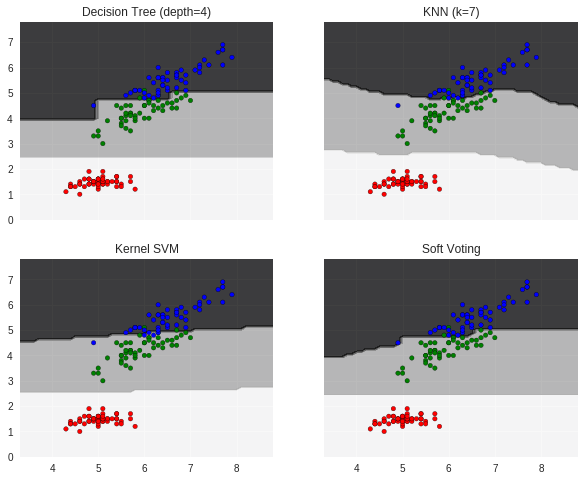

In [8]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)
cc=['r','g','b']
ycc= [cc[i]  if i<3  else '' for i in y]

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.8)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=ycc,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [0]:
!pip install graphviz

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
# load dataset
data = load_wine()

# feature matrix
X = data.data

# target vector
y = data.target

# class labels
labels = data.feature_names

# print dataset description
#print(data.DESCR)

estimator = DecisionTreeClassifier()
estimator.fit(X, y)

graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))

#display(SVG(graph.pipe(format='svg')))  # falta hacer compatible



In [0]:
# Cargar el Drive helper y mount
from google.colab import drive

# Link y Codigo de autorizacion.
drive.mount('/content/drive_all')

# Cargar datos del google drive
#data = pd.read_csv('/content/drive_all/My Drive/PYTHON/dataset/polydata2.csv')


Drive already mounted at /content/drive_all; to attempt to forcibly remount, call drive.mount("/content/drive_all", force_remount=True).


In [0]:
import graphviz as gv

def dot_graph(R):
    """This function takes binary relation R as inputs and shows this relation as
       a graph using the module graphviz.
    """
    dot = gv.Digraph()
    Nodes = { tripleToStr(a) for (a,b) in R } | { tripleToStr(b) for (a,b) in R }
    for n in Nodes:
        dot.node(n)
    for (x, y) in R:
        dot.edge(tripleToStr(x), tripleToStr(y))
    return dot

In [0]:
!pip install mglearn




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import graphviz

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="/content/drive_all/My Drive/PYTHON/dataset/tree.dot", class_names=["malignant", "benign"],feature_names=cancer.feature_names, impurity=False, filled=True)


import graphviz
with open("/content/drive_all/My Drive/PYTHON/dataset/tree.dot") as f:
    dot_graph = f.read()

#graphviz.Source(dot_graph)

In [0]:
main()
